# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane appear to be the most effective drug treatments in reducing tumor volume.
- The data shows that the study did not study the same number of mice for each drug, which could potentially skew the results. 
- The Capomulin data shows that tumor volume was in direct relation to the weight of the mouse being studied - meaning the higher the weight the larger tumor.
- In terms of study division between male and female the study was almost evenly divided.
 

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [90]:
# Checking the number of mice.
mouse_study['Mouse ID'].nunique()

249

In [91]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = mouse_study.loc[mouse_study[['Mouse ID', 'Timepoint']].duplicated(keep=False)]
duplicate_mice_df['Mouse ID'].unique()

array(['g989'], dtype=object)

In [92]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [93]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study.loc[mouse_study['Mouse ID']!='g989']
mouse_study_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [94]:
# Checking the number of mice in the clean DataFrame.
mouse_study_clean['Mouse ID'].nunique()

248

## Summary Statistics

In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume = mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_tumor_volume = mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_volume_variance = mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
standard_dev_tumor_volume = mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_tumor_volume = mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

mouse_study_summary = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume, 'Median Tumor Volume': median_tumor_volume, 
                                    'Tumor Volume Variance': tumor_volume_variance, 'Tumor Volume Std. Dev.': standard_dev_tumor_volume, 
                                    'Tumor Volume Std. Err.': sem_tumor_volume})
mouse_study_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [96]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_summary2 = mouse_study_clean.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median','var','std','sem']})
mouse_study_summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Number of Observed Mice'>

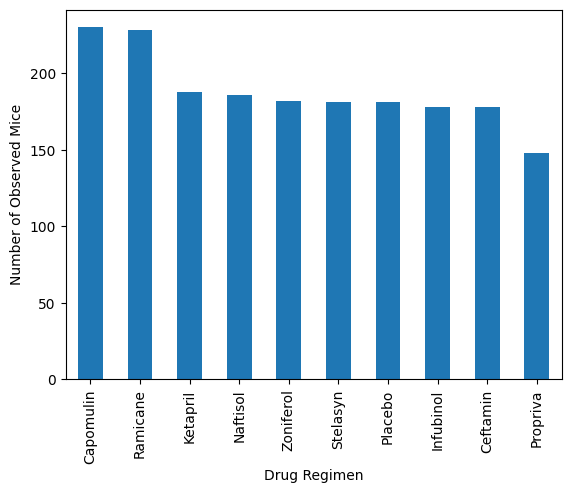

In [97]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts_df = mouse_study_clean["Drug Regimen"].value_counts()
drug_counts_df.plot.bar(x = "Drug Regimen", 
                        y = "Timepoint", 
                        rot = 90, 
                        xlabel = "Drug Regimen", 
                        ylabel = "Number of Observed Mice")

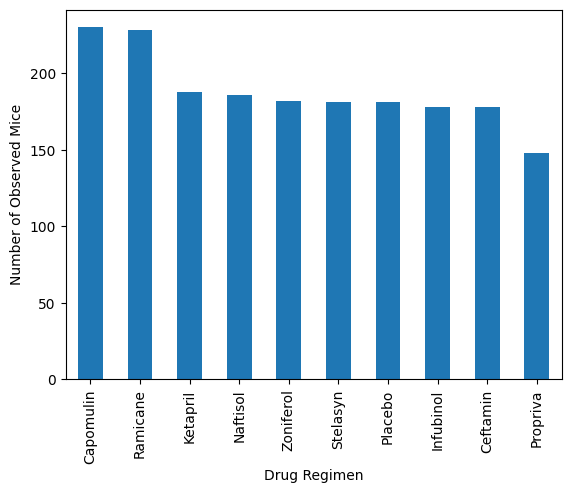

In [98]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts_df.plot(kind = 'bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mice')
plt.xticks(rotation=90)
plt.show()

<Axes: title={'center': 'Percentages of Male Vs. Female Mice'}, ylabel='count'>

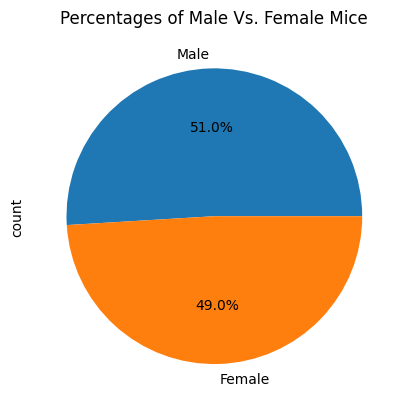

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = mouse_study_clean['Sex'].value_counts()
gender_df.plot.pie(title = 'Percentages of Male Vs. Female Mice', labels = ['Male','Female'], autopct = '%1.1f%%')

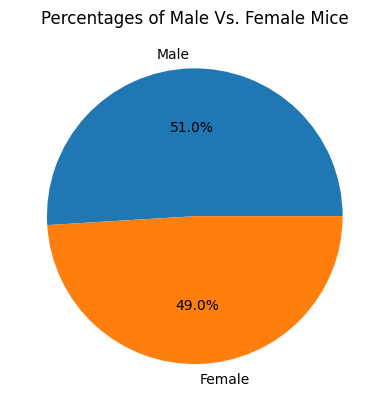

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_df, labels = gender_df.index, autopct = '%1.1f%%')
plt.title('Percentages of Male Vs. Female Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [101]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = mouse_study_clean.groupby(['Mouse ID'])['Timepoint'].max()
final_tumor_volume = final_tumor_volume.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = final_tumor_volume.merge(mouse_study_clean, on = ['Mouse ID', 'Timepoint'], how = 'left')
final_tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [102]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles =tumor_volume.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr

    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

    print(f"{drug}:")
    print(f"The lower quartile is: {lower_q}")
    print(f"The upper quartile is: {upper_q}")
    print(f"The IQR is: {iqr}")
    print(f"The lower bound is: {lower_bound}")
    print(f"The upper bound is: {upper_bound}")
    if not outliers.empty:
        print(f"Potential Outliers: {outliers}")
    else:
        print("There were no potential outliers found.")
    print(f"---")

Capomulin:
The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The IQR is: 7.781863460000004
The lower bound is: 20.70456164999999
The upper bound is: 51.83201549
There were no potential outliers found.
---
Ramicane:
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The IQR is: 9.098536719999998
The lower bound is: 17.912664470000003
The upper bound is: 54.30681135
There were no potential outliers found.
---
Infubinol:
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The IQR is: 11.477135160000003
The lower bound is: 36.83290494999999
The upper bound is: 82.74144559000001
Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
---
Ceftamin:
The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The IQR is: 15.577752179999997
The lower bound is: 25.355449580000002
The upper bound is: 87.66645829999999
There were no potential outliers found.
---


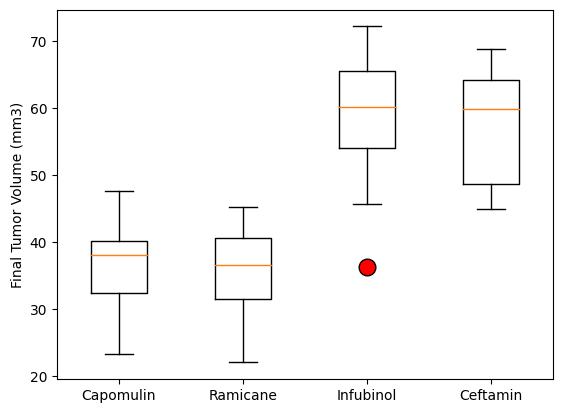

In [103]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot = dict(markerfacecolor = 'red', markersize = 12)
plt.boxplot(tumor_vol_data, labels = drugs, flierprops = box_plot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

<Axes: title={'center': 'Capomulin Treatment'}, xlabel='Timepoint'>

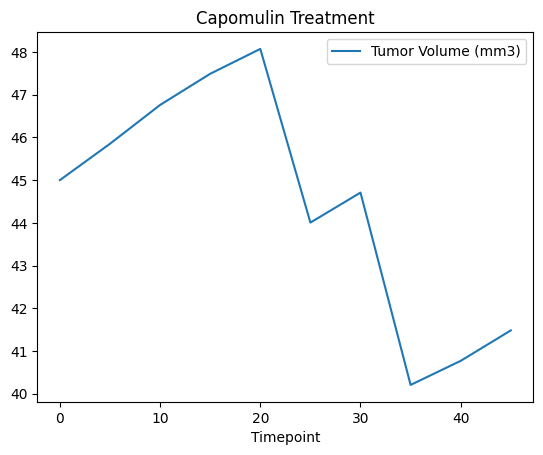

In [104]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = mouse_study_clean.loc[(mouse_study_clean['Drug Regimen'] == 'Capomulin') &
                                (mouse_study_clean['Mouse ID'] == 'l509')] [['Timepoint', 'Tumor Volume (mm3)']]
capomulin.plot.line(x = 'Timepoint', y = 'Tumor Volume (mm3)', title = 'Capomulin Treatment')

<Axes: title={'center': 'Mouse Weight vs. Average Observed Tumor Volume (Capomulin)'}, xlabel='Weight (g)', ylabel='Average Tumor Volume(mm3)'>

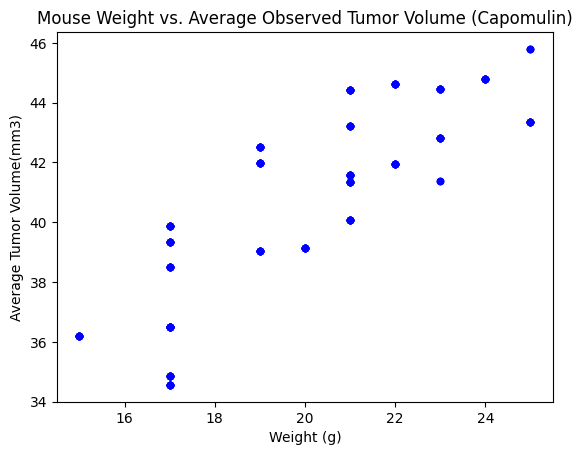

In [134]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_tumor_vol = mouse_study_clean.loc[(mouse_study_clean['Drug Regimen'] == 'Capomulin')]      
average_tumor_vol = pd.DataFrame(capomulin_tumor_vol.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns = {'Tumor Volume (mm3)': 'Average Tumor Volume(mm3)'})     
mouse_weight = capomulin_tumor_vol[['Mouse ID', 'Weight (g)']]
average_tumor_volume_df = mouse_weight.merge(average_tumor_vol, how = 'left', on = 'Mouse ID')
average_tumor_volume_df.plot.scatter(x = 'Weight (g)', y = 'Average Tumor Volume(mm3)', title = 'Mouse Weight vs. Average Observed Tumor Volume (Capomulin)', marker = 'o', color = 'blue')

## Correlation and Regression

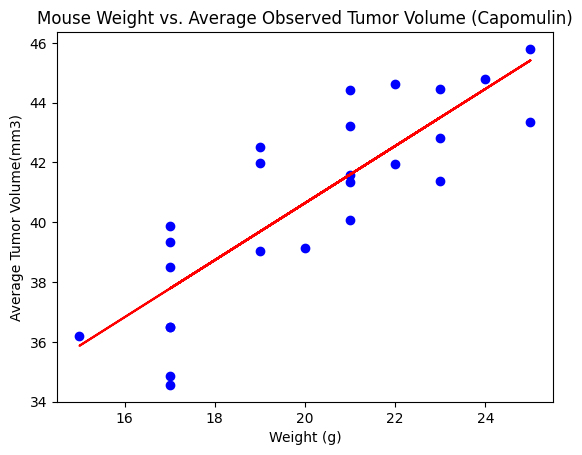

In [133]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_study_clean[mouse_study_clean['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
correlation = st.pearsonr(mouse_weight, avg_tumor_vol)

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_vol)
regress_line = mouse_weight * slope + intercept

plt.scatter(mouse_weight, avg_tumor_vol, marker = 'o', color = 'blue')
plt.plot(mouse_weight, regress_line, color = 'red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume(mm3)')
plt.title('Mouse Weight vs. Average Observed Tumor Volume (Capomulin)')
plt.show()
